The task

The Employees.csv file records data about the employees of a company. The dataset is from Business Analytics for Managers by Wolfgang Jank. In this problem, the managers are concerned with the issue of equal pay in the company. If we compare male and female employees with the same level of experience, are they paid the same on average?

Split the data into training and test sets and perform Exploratory Data Analysis

Estimate a linear regression

Model Evaluation

EDA: check the dependency between salary and gender, salary and experience, salary and experience by gender

you may need to do some data preparation

linear regression of salary by female + experience; also log transformation of salary may improve the results

visualize the regression

evaluate the models by rmse or/and r2 metrics

In [26]:
# importing modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [27]:
# Importing the dataset
Employees_df = pd.read_csv("Employees.csv")
Employees_df.describe()

,Experience,Salary
count,208.000000,208.000000
mean,12.048077,79843.846154
std,7.314706,22512.307844
min,2.000000,53400.000000
25%,7.000000,66000.000000
50%,10.000000,74000.000000
75%,16.000000,88000.000000
max,39.000000,194000.000000


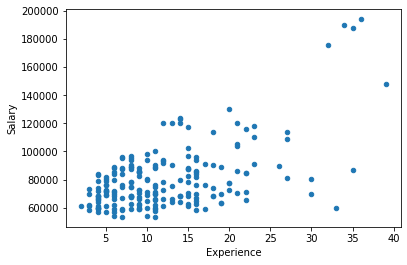

In [28]:
# plot
Employees_df.plot(kind='scatter', x='Experience', y='Salary')

In [50]:
# Splitting the original dataset  
Female_df = Employees_df[Employees_df['Gender'] == 'Female']
Male_df = Employees_df[Employees_df['Gender'] == 'Male']

<BarContainer object of 208 artists>

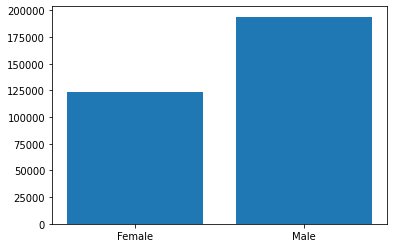

In [30]:
# The dependency between gender and salary
plt.bar(Employees_df['Gender'], Employees_df['Salary'])

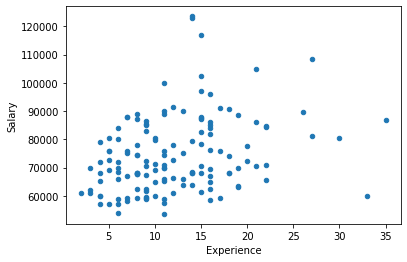

In [31]:
Female_df.plot(kind='scatter', x='Experience', y='Salary')

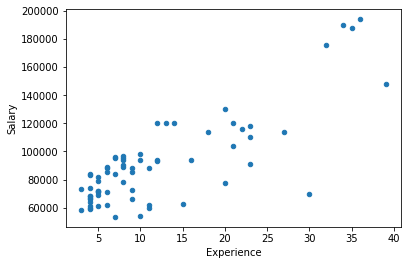

In [32]:
Male_df.plot(kind='scatter', x='Experience', y='Salary')

In [56]:
# Scaling the salary and getting feautre and label variables for females to perform regression
X = Female_df[["Experience"]]
Y = Female_df["Salary"]
Y = np.log(Y)
Y

0      11.267025
1      11.103452
2      11.021902
3      11.018629
4      11.002100
         ...    
135    11.512925
136    11.724806
137    11.362103
138    11.669929
139    11.002100
Name: Salary, Length: 140, dtype: float64

In [57]:
# Splitting the shuffled data into training and test datasets
# containing 75% and 25% of the original data respectivly. 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
x_train

,Experience
45,8
75,9
91,6
106,30
5,4
...,...
133,21
95,12
134,14
108,14


In [58]:
# Creating the model
empfem = LinearRegression()
empfem.fit(x_train, y_train)
empfem.predict(x_test)

array([11.1977378 , 11.24147611, 11.21523312, 11.14525183, 11.1977378 ,
       11.13650417, 11.18899014, 11.18024248, 11.24147611, 11.28521441,
       11.18899014, 11.15399949, 11.15399949, 11.24147611, 11.27646675,
       11.21523312, 11.18024248, 11.25897143, 11.23272844, 11.24147611,
       11.15399949, 11.20648546, 11.32895272, 11.23272844, 11.22398078,
       11.27646675, 11.23272844, 11.14525183, 11.17149482, 11.33770038,
       11.17149482, 11.15399949, 11.1977378 , 11.16274715, 11.18024248])

In [60]:
# The error
mean_squared_error(y_test, empfem.predict(x_test))

0.013704753200515882

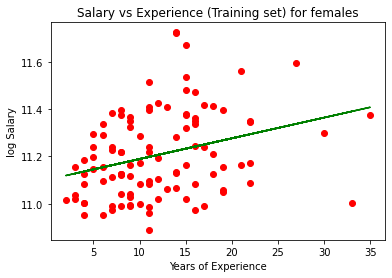

In [62]:
# Visualizing the model on training data
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, empfem.predict(x_train), color="green")
plt.title("Salary vs Experience (Training set) for females")
plt.xlabel("Years of Experience")
plt.ylabel("log Salary")
plt.show()

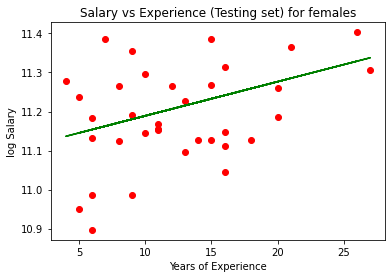

In [64]:
# Visualizing the model on test data
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, empfem.predict(x_test), color = "green")
plt.title("Salary vs Experience (Testing set) for females")
plt.xlabel("Years of Experience")
plt.ylabel("log Salary")
plt.show()